## Phase 1: Data Preprocessing & Baseline

In [39]:
import pandas as pd 
import numpy as np 

In [40]:
file_path=r"C:\Users\Administrator\OneDrive\Desktop\Machine_learning_cs303\Practicals\Experiment_8\dataset\adult.csv"
data=pd.read_csv(file_path)
data.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Countryx,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1    Workclass        32561 non-null  object
 2    Fnlwgt           32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-Num    32561 non-null  int64 
 5    Marital-Status   32561 non-null  object
 6    Occupation       32561 non-null  object
 7    Relationship     32561 non-null  object
 8    Race             32561 non-null  object
 9    Sex              32561 non-null  object
 10   Capital-Gain     32561 non-null  int64 
 11   Capital-Loss     32561 non-null  int64 
 12   Hours-Per-Week   32561 non-null  int64 
 13   Native-Countryx  32561 non-null  object
 14   Salary           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [42]:
data.describe()

,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [43]:
# Checking for missing values

data.isnull().sum()

Age                 0
 Workclass          0
 Fnlwgt             0
 Education          0
 Education-Num      0
 Marital-Status     0
 Occupation         0
 Relationship       0
 Race               0
 Sex                0
 Capital-Gain       0
 Capital-Loss       0
 Hours-Per-Week     0
 Native-Countryx    0
 Salary             0
dtype: int64

No missing Values 

In [44]:
# Checking the dictinct values for categorical features

for col in data.columns:
    if data[col].dtype=='object':
        print(f"{col}-Distinct Values:{len(data[col].unique())}")

 Workclass-Distinct Values:9
 Education-Distinct Values:16
 Marital-Status-Distinct Values:7
 Occupation-Distinct Values:15
 Relationship-Distinct Values:6
 Race-Distinct Values:5
 Sex-Distinct Values:2
 Native-Countryx-Distinct Values:42
 Salary-Distinct Values:2


We will use one-hot-encoding for encoding the object type data 

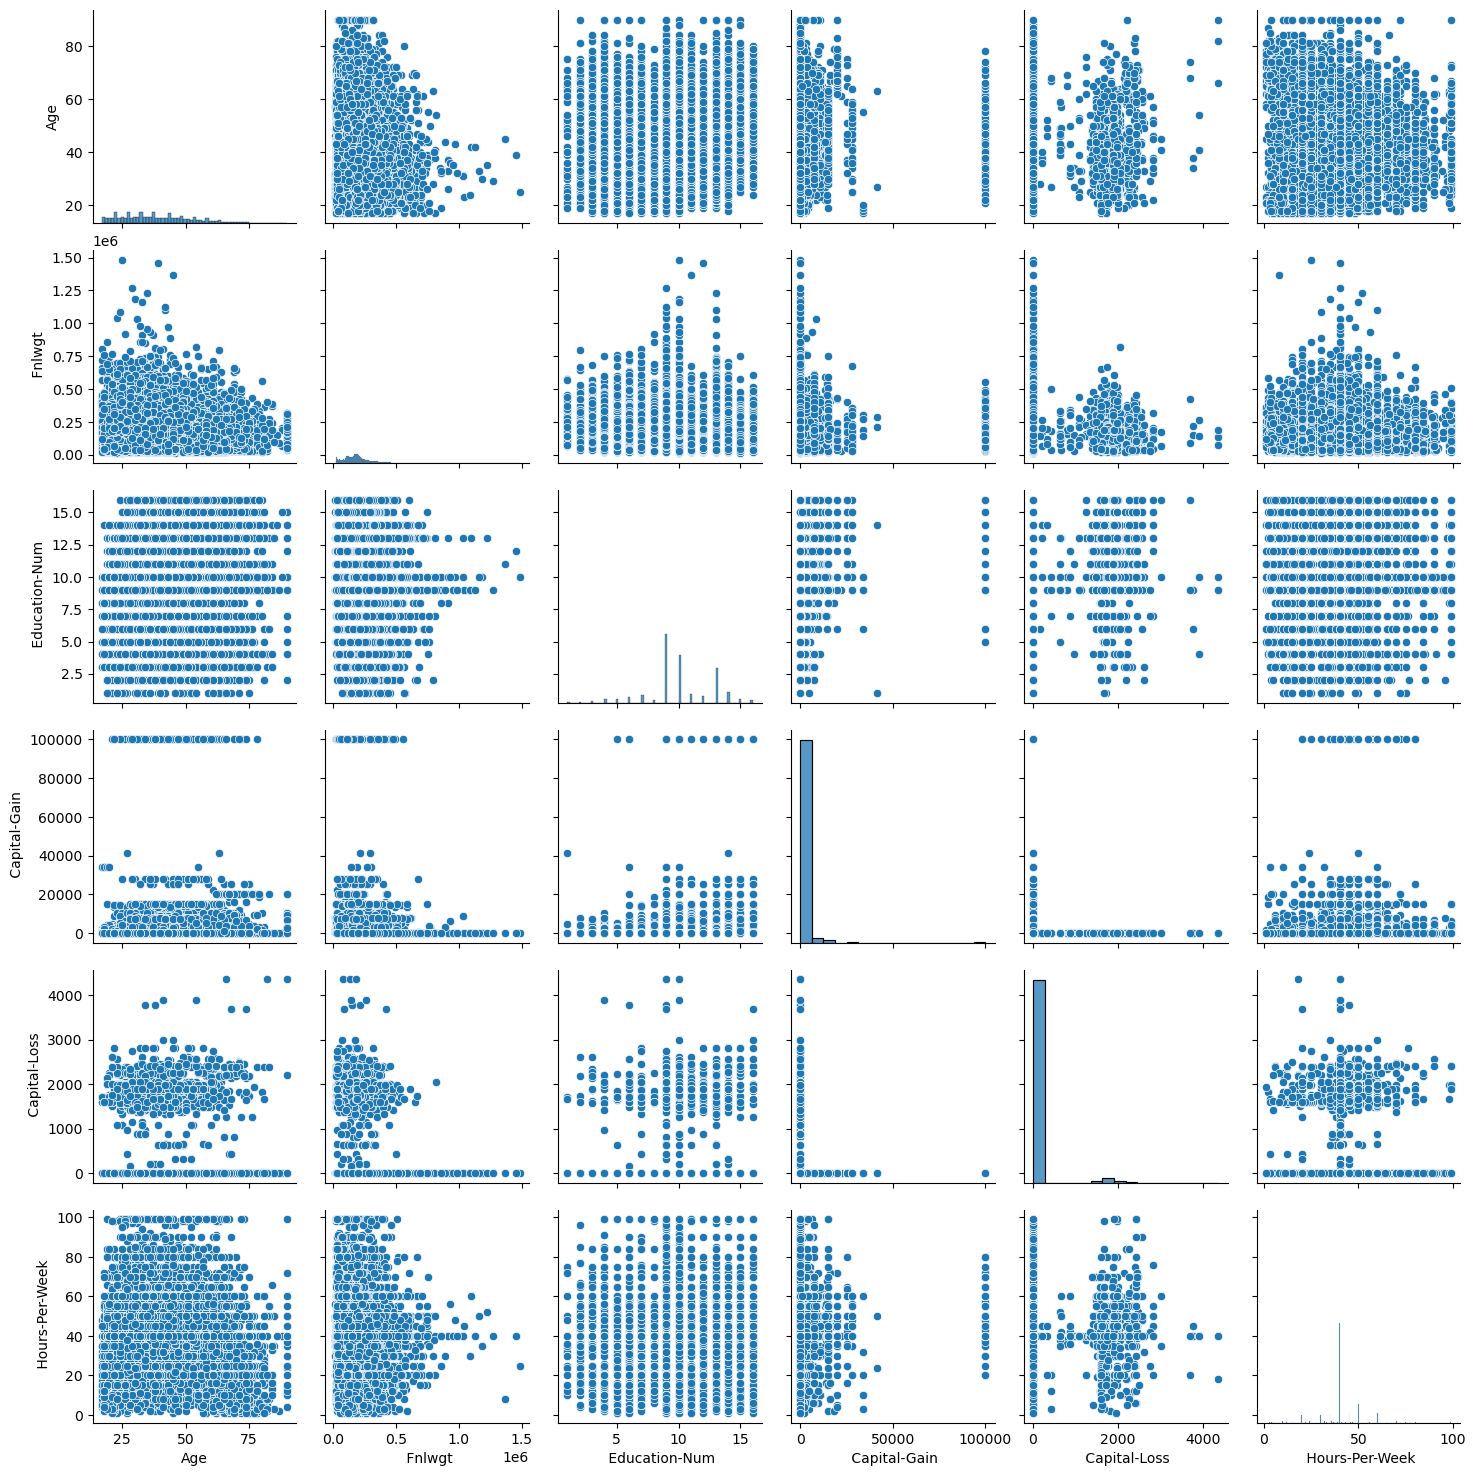

In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.pairplot(data)

In [92]:
print(data[data[' Salary']==" <=50K"].shape)
print(data[data[' Salary']==" >50K"].shape)

(24720, 15)
(7841, 15)


Data is Imbalance here

In [46]:
# Features extraction 

numeric_features=[x for x in data.columns if not (data[x].dtype == 'object')]
categoric_features=[x for x in data.columns if (data[x].dtype == 'object' and x != ' Salary')]

numeric_features
categoric_features

[' Workclass',
 ' Education',
 ' Marital-Status',
 ' Occupation',
 ' Relationship',
 ' Race',
 ' Sex',
 ' Native-Countryx']

In [60]:
# Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Numeric 
numeric_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('Scaling',StandardScaler())
])

# Categorical 
categorical_pipeline=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='most_frequent')),
    ('Encoding', OneHotEncoder(drop='first', sparse_output=False))
])


# Column Transformation
preprocessing=ColumnTransformer(transformers=[
    ('Numeric',numeric_pipeline,numeric_features),
    ('Categoric',categorical_pipeline,categoric_features),
],remainder='passthrough')

In [70]:
# Train test split and also label encoding the salary column 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=data.iloc[:,:-1]
y=data.iloc[:,-1]

# Step 1: Split into Train + Temp (where Temp will later be split into Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)  # 70% train, 30% temp

# Step 2: Split Temp into Validation + Test (each 15% of total data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)  # 15% validation, 15% test



le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val=le.transform(y_val)

In [71]:
from sklearn.linear_model import LogisticRegression

lr_model=Pipeline(steps=[
    ("preprocessing",preprocessing),
    ('model',LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', ' Fnlwgt',
                                                   ' Education-Num',
                                                   ' Capital-Gain',
                                                   ' Capital-Loss',
                                                   ' Hours-Per-Week']),
                                                 ('Categoric',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [' Workclass', ' Education',
                                                   ' Marital-Status',
                                                   ' Occupation',
                                                   ' Relationship', ' Race',
                                                   ' Sex',
                                                   ' Native-Countryx'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [78]:
from sklearn.metrics import classification_report,f1_score , accuracy_score 

# Predict on validation data
y_val_pred = lr_model.predict(X_val)

# For probability-based metrics (ROC-AUC)
y_val_proba = lr_model.predict_proba(X_val)[:, 1]

# Calculate metrics
print(classification_report(y_val,y_val_pred))



              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3708
           1       0.74      0.62      0.68      1176

    accuracy                           0.86      4884
   macro avg       0.81      0.78      0.79      4884
weighted avg       0.85      0.86      0.85      4884



In [79]:
y_test_pred = lr_model.predict(X_test)
print("Final Test F1:", f1_score(y_test, y_test_pred))
print("Final Test Accuracy:", accuracy_score(y_test, y_test_pred))


Final Test F1: 0.6632366697848456
Final Test Accuracy: 0.8526100307062436


## Phase 2: Model Training and Hyperparameter Tuning

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


base_estimator = DecisionTreeClassifier(max_depth=2)
ada_model=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=100,
        learning_rate=0.5,
        random_state=42,
        algorithm='SAMME'

    ))
])

ada_y_pred=ada_model.fit(X_train,y_train).predict(X_test)
print(f"Accuracy :{accuracy_score(y_test,ada_y_pred)}")

Accuracy :0.855885363357216


In [82]:
# HyperParameter Tunning
from sklearn.model_selection import RandomizedSearchCV

# --- Hyperparameter space ---
param_dist = {
    'model__n_estimators': [50, 100, 150, 200, 250],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'model__estimator__max_depth': [1, 2, 3],
    'model__algorithm': ['SAMME', 'SAMME.R']
}


ada_random_search=RandomizedSearchCV(
    estimator=ada_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# --- Fit the randomized search ---
ada_random_search.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Numeric',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('Scaling',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                ' '
                                                                                'Fnlwgt',
                                                                                ' '
                                                                                'Education-Num',
                                                                                ' '
                                                                                'Capital-Gain',
                                                                                ' '
                                                                                'Capital-Loss',
                                                                                ' '
                                                                                'Hours-Per-Week']),
                                                                              ('Categoric',
                                                                               Pipeline(steps=[('Imputer',
                                                                                                SimpleImput...
                                              AdaBoostClassifier(algorithm='SAMME',
                                                                 estimator=DecisionTreeClassifier(max_depth=2),
                                                                 learning_rate=0.5,
                                                                 n_estimators=100,
                                                                 random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__algorithm': ['SAMME',
                                                             'SAMME.R'],
                                        'model__estimator__max_depth': [1, 2,
                                                                        3],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.5,
                                                                 1.0],
                                        'model__n_estimators': [50, 100, 150,
                                                                200, 250]},
                   random_state=42, scoring='f1')

In [95]:
print(f"BestParamters: {ada_random_search.best_params_}")
print(f"Best CV Score (f1): {ada_random_search.best_score_}")

BestParamters: {'model__n_estimators': 200, 'model__learning_rate': 1.0, 'model__estimator__max_depth': 3, 'model__algorithm': 'SAMME'}
Best CV Score (f1): nan


In [96]:
best_ada=ada_random_search.best_estimator_

# On validation set
y_val_pred = best_ada.predict(X_val)
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# On test set (final)
y_test_pred = best_ada.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Validation F1 Score: 0.7122171945701358
Validation Accuracy: 0.8697788697788698
Test F1 Score: 0.7053979871912168
Test Accuracy: 0.8681678607983623


**XGBoosting**

In [100]:
import sys
print(sys.executable)


c:\ProgramData\anaconda3\python.exe


In [111]:
import sys
!{sys.executable} -m pip install xgboost --upgrade --quiet


In [112]:
from xgboost import XGBClassifier
print("XGBoost is working ✅")


XGBoost is working ✅


In [113]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score


In [117]:
# Base XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
xgb_model=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',xgb)
])
y_pred=xgb_model.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test,y_pred))

c:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:06:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.869396110542477


In [119]:
from sklearn.model_selection import RandomizedSearchCV


param_dist_xgb = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 10],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__lambda': [0, 0.5, 1, 2],  # L2 regularization
}

xgb_random_search=RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring='f1',
    random_state=42,
    n_jobs=-1


)

xgb_random_search.fit(X_train,y_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:11:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Numeric',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('Scaling',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                ' '
                                                                                'Fnlwgt',
                                                                                ' '
                                                                                'Education-Num',
                                                                                ' '
                                                                                'Capital-Gain',
                                                                                ' '
                                                                                'Capital-Loss',
                                                                                ' '
                                                                                'Hours-Per-Week']),
                                                                              ('Categoric',
                                                                               Pipeline(steps=[('Imputer',
                                                                                                SimpleImputer(st...
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=-1,
                                                            num_parallel_tree=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                        'model__lambda': [0, 0.5, 1, 2],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [3, 5, 7, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                400],
                                        'model__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1')

In [120]:
print(f"Best Parameters: {xgb_random_search.best_params_}")
print(f"Best CV score (f1): {xgb_random_search.best_score_}")

Best Parameters: {'model__subsample': 1.0, 'model__n_estimators': 300, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__lambda': 0, 'model__colsample_bytree': 0.8}
Best CV score (f1): nan


In [121]:
best_xgb=xgb_random_search.best_estimator_

# Validation
y_val_pred = best_xgb.predict(X_val)
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test
y_test_pred = best_xgb.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Validation F1 Score: 0.7219917012448133
Validation Accuracy: 0.8765356265356266
Test F1 Score: 0.6980867942137191
Test Accuracy: 0.867553735926305


In [123]:
best_xgb.named_steps['model'].fit(
    preprocessing.transform(X_train), y_train,
    eval_set=[(preprocessing.transform(X_val), y_val)],
    verbose=True
)


[0]	validation_0-logloss:0.53024
[1]	validation_0-logloss:0.50950
[2]	validation_0-logloss:0.49201
[3]	validation_0-logloss:0.48072
[4]	validation_0-logloss:0.46618
[5]	validation_0-logloss:0.45335
[6]	validation_0-logloss:0.44145
[7]	validation_0-logloss:0.43001
[8]	validation_0-logloss:0.42006
[9]	validation_0-logloss:0.41050
[10]	validation_0-logloss:0.40280
[11]	validation_0-logloss:0.39631


c:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:13:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[12]	validation_0-logloss:0.38895
[13]	validation_0-logloss:0.38212
[14]	validation_0-logloss:0.37579
[15]	validation_0-logloss:0.36959
[16]	validation_0-logloss:0.36390
[17]	validation_0-logloss:0.35973
[18]	validation_0-logloss:0.35555
[19]	validation_0-logloss:0.35092
[20]	validation_0-logloss:0.34674
[21]	validation_0-logloss:0.34340
[22]	validation_0-logloss:0.34045
[23]	validation_0-logloss:0.33702
[24]	validation_0-logloss:0.33361
[25]	validation_0-logloss:0.33031
[26]	validation_0-logloss:0.32736
[27]	validation_0-logloss:0.32524
[28]	validation_0-logloss:0.32244
[29]	validation_0-logloss:0.31975
[30]	validation_0-logloss:0.31714
[31]	validation_0-logloss:0.31505
[32]	validation_0-logloss:0.31304
[33]	validation_0-logloss:0.31113
[34]	validation_0-logloss:0.30916
[35]	validation_0-logloss:0.30710
[36]	validation_0-logloss:0.30522
[37]	validation_0-logloss:0.30408
[38]	validation_0-logloss:0.30276
[39]	validation_0-logloss:0.30129
[40]	validation_0-logloss:0.30014
[41]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0, learning_rate=0.05,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1, ...)

## Phase 3: Evaluation and Comparison

In [125]:
from sklearn.metrics import roc_auc_score , roc_curve , accuracy_score , classification_report

ada_pred=best_ada.predict(X_test)
xg_pred=best_xgb.predict(X_test)

print(f"AdaBoost\n{classification_report(y_test,ada_pred)}")
print(f"XGBoost\n{classification_report(y_test,xg_pred)}")

AdaBoost
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3709
           1       0.76      0.66      0.71      1176

    accuracy                           0.87      4885
   macro avg       0.83      0.80      0.81      4885
weighted avg       0.86      0.87      0.86      4885

XGBoost
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3709
           1       0.77      0.64      0.70      1176

    accuracy                           0.87      4885
   macro avg       0.83      0.79      0.81      4885
weighted avg       0.86      0.87      0.86      4885



In [128]:
import plotly.graph_objects as go

lr_fpr ,lr_tpr , lr_threshold = roc_curve(y_test,ada_pred)
lr_auc=roc_auc_score(y_test,ada_pred)

rf_fpr ,rf_tpr , rf_threshold = roc_curve(y_test,xg_pred)
rf_auc=roc_auc_score(y_test,xg_pred)
# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'AdaBoost (Area = {lr_auc:.2f})'
)

trace1 = go.Scatter(
    x=rf_fpr,
    y=rf_tpr,
    mode='lines',
    name=f'XGBoost (Area = {rf_auc:.2f})'
)



# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=700,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()